# PyTorch Computer Vision

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu117
0.14.1+cu117


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [3]:
# Download the fashion MNIST dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [4]:
image, label = training_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
training_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Text(0.5, 1.0, 'Ankle boot')

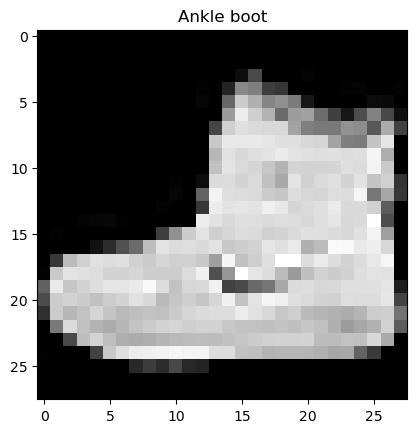

In [6]:
image, label = training_data[0]

plt.imshow(image.squeeze(), cmap="gray")
plt.title(training_data.classes[label])

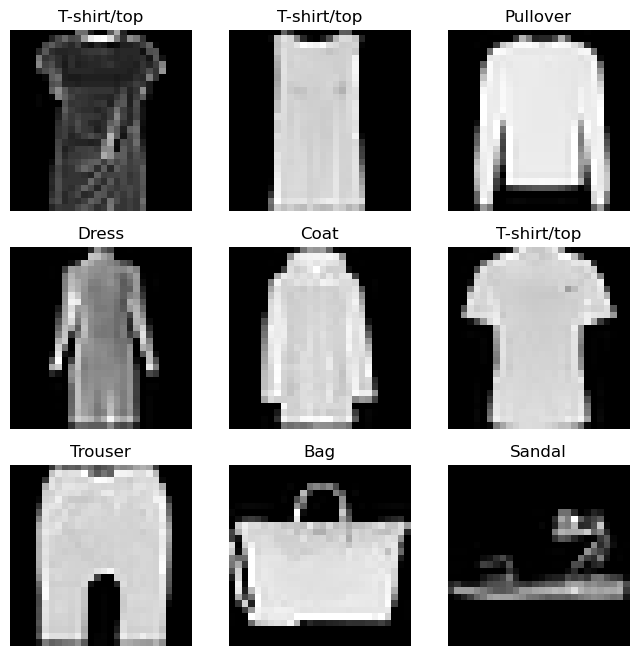

In [7]:
# Plot 9 random images from the training dataset in a 9 x 9 grid
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(training_data.classes[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

In [8]:
# Use the torch.utils.data.DataLoader class to create an iterator with batch size of 32
# Shuffle the training data
batch_size = 32
train_dataloader = torch.utils.data.DataLoader(
    training_data,
    batch_size=batch_size,
    shuffle=True,
)
test_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False,
)

In [9]:
# Print the most important attributes of the dataloader
print("Training data:", len(train_dataloader.dataset))
print("Test data:", len(test_dataloader.dataset))
print("Batch size:", train_dataloader.batch_size)
print("Number of batches:", len(train_dataloader))

Training data: 60000
Test data: 10000
Batch size: 32
Number of batches: 1875


In [10]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [11]:
# Plot 1 image from the train_dataloader with mapplotlib
for X, y in train_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([32, 1, 28, 28])
Shape of y:  torch.Size([32]) torch.int64


(-0.5, 27.5, 27.5, -0.5)

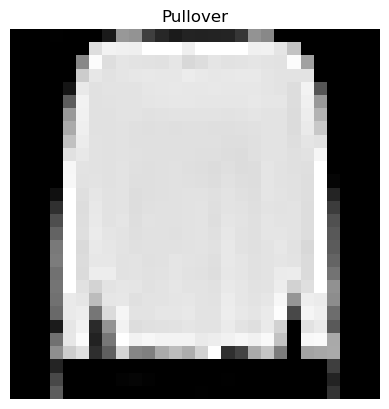

In [12]:
# get the first batch of images
images, targets = next(iter(train_dataloader))

# show a random image from the batch with its label
rand_idx = torch.randint(len(images), size=(1,)).item()
img, label = images[rand_idx], targets[rand_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(training_data.classes[label])
plt.axis("off")

In [13]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
output = flatten_model(x)

print("Before flatten:", x.shape)
print("After flatten:", output.shape)

Before flatten: torch.Size([1, 28, 28])
After flatten: torch.Size([1, 784])


In [14]:
output.squeeze().shape

torch.Size([784])

In [15]:
class FasionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.Linear(hidden_units, output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)


torch.manual_seed(42)
model_0 = FasionMNISTModelV0(28 * 28, 10, len(training_data.classes))
model_0.to("cpu")

FasionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [16]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [17]:
import torchmetrics

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)
acc_fn = torchmetrics.Accuracy(
    task="multiclass", num_classes=len(training_data.classes)
)

In [41]:
from timeit import default_timer as timer


def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time


start_time = timer()
end_time = timer()

print_train_time(start_time, end_time, device)

Train time on cuda: 0.000 seconds


2.0107000068492198e-05

In [42]:
from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += acc_fn(y, test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(
        f"\nTrain Loss: {train_loss:.3f} | Test Loss: {test_loss:.3f} | Test acc: {test_acc} "
    )

end_time = timer()

train_time_model_0 = print_train_time(
    start_time, end_time, str(next(model_0.parameters()).device)
)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.430 | Test Loss: 0.477 | Test acc: 0.8342651724815369 
Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.430 | Test Loss: 0.477 | Test acc: 0.8342651724815369 
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train Loss: 0.430 | Test Loss: 0.477 | Test acc: 0.8342651724815369 
Train time on cpu: 15.764 seconds


In [43]:
torch.manual_seed(42)


def eval_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    acc_fn,
    device: torch.device,
):
    loss, acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += acc_fn(y, y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc.item(),
    }


model_0_results = eval_model(model_0, test_dataloader, loss_fn, acc_fn, "cpu")

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FasionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 0.8342651724815369}

In [44]:
class FasionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.ReLU(),
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [45]:
torch.manual_seed(42)
model_1 = FasionMNISTModelV1(28 * 28, 10, len(training_data.classes)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [46]:
acc_fn = torchmetrics.Accuracy(
    task="multiclass", num_classes=len(training_data.classes)
).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)


In [47]:
def train_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    acc_fn,
    device: torch.device = device,
):
    model_0.train()
    train_loss, train_acc = 0, 0

    for X, y in data_loader:
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += acc_fn(y, y_pred.argmax(dim=1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc*100:.0f}%")


In [48]:
def test_step(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    acc_fn,
    device: torch.device = device,
):
    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += acc_fn(y, test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc*100:.0f}%")


In [49]:
epochs = 3

start_time = timer()

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n------\n")
    train_step(model_1, train_dataloader, loss_fn, optimizer, acc_fn, device)
    test_step(model_1, test_dataloader, loss_fn, acc_fn, device)
    print("------\n\n")

end_time = timer()

train_time_model_1 = print_train_time(start_time, end_time, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
------

Train loss: 1.05878 | Train acc: 62%
Test loss: 0.99506 | Test acc: 64%
------


Epoch 1
------

Train loss: 0.91331 | Train acc: 66%
Test loss: 0.90508 | Test acc: 67%
------


Epoch 2
------

Train loss: 0.87982 | Train acc: 67%
Test loss: 0.89476 | Test acc: 66%
------


Train time on cuda: 20.650 seconds


In [50]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, acc_fn, device)
model_1_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FasionMNISTModelV1',
 'model_loss': 0.8947636485099792,
 'model_acc': 0.6646365523338318}

In [51]:
class FasionMNISTModelV2(nn.Module):
    """
    TinyVGG Replication
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=output_shape),
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [52]:
torch.manual_seed(42)
model_2 = FasionMNISTModelV2(
    input_shape=1, hidden_units=10, output_shape=len(test_data.classes)
).to(device)

In [53]:
torch.manual_seed(42)

images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Images Shape {images.shape}")
print(f"Single Image Shape {test_image.shape}")
print(f"Test Image: {test_image}")

Images Shape torch.Size([32, 3, 64, 64])
Single Image Shape torch.Size([3, 64, 64])
Test Image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  

In [54]:
conv_layer = nn.Conv2d(
    in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0
)

test_image.shape, conv_layer(test_image).shape

(torch.Size([3, 64, 64]), torch.Size([10, 62, 62]))

In [55]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image.shape, max_pool_layer(conv_layer(test_image)).shape

(torch.Size([3, 64, 64]), torch.Size([10, 31, 31]))

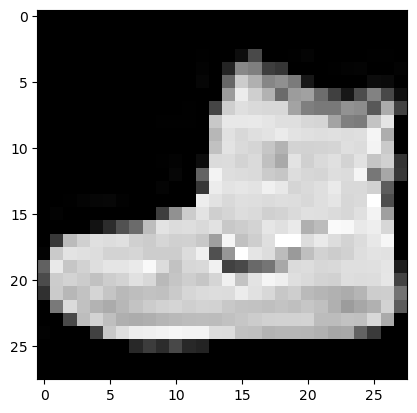

In [56]:
image
plt.imshow(image.squeeze(), cmap="gray")

In [57]:
# print(image.shape)

# model_2.eval()
# with torch.inference_mode():
#     new_image = model_2(image.to(device)).to("cpu")
# plt.imshow(new_image)

In [58]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [59]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}")
    train_step(model_2, train_dataloader, loss_fn, optimizer, acc_fn, device)
    test_step(model_2, test_dataloader, loss_fn, acc_fn, device)

end_time = timer()

train_time_model_2 = print_train_time(start_time, end_time)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
Train loss: 0.59582 | Train acc: 78%
Test loss: 0.39527 | Test acc: 86%
Epoch 1
Train loss: 0.36031 | Train acc: 87%
Test loss: 0.34664 | Test acc: 87%
Epoch 2
Train loss: 0.32322 | Train acc: 88%
Test loss: 0.31408 | Test acc: 88%
Train time on None: 27.058 seconds


In [60]:
model_2_results = eval_model(model_2, test_dataloader, loss_fn, acc_fn, device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FasionMNISTModelV2',
 'model_loss': 0.3140757083892822,
 'model_acc': 0.8844848275184631}

In [61]:
model_0_results

{'model_name': 'FasionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 0.8342651724815369}

In [148]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])

compare_results

,model_name,model_loss,model_acc
0,FasionMNISTModelV0,0.476639,0.834265
1,FasionMNISTModelV1,0.894764,0.664637
2,FasionMNISTModelV2,0.314076,0.884485


In [149]:
compare_results["train_time"] = [
    train_time_model_0,
    train_time_model_1,
    train_time_model_2,
]

compare_results


,model_name,model_loss,model_acc,train_time
0,FasionMNISTModelV0,0.476639,0.834265,15.764184
1,FasionMNISTModelV1,0.894764,0.664637,20.650423
2,FasionMNISTModelV2,0.314076,0.884485,27.057719


Text(0, 0.5, 'model')

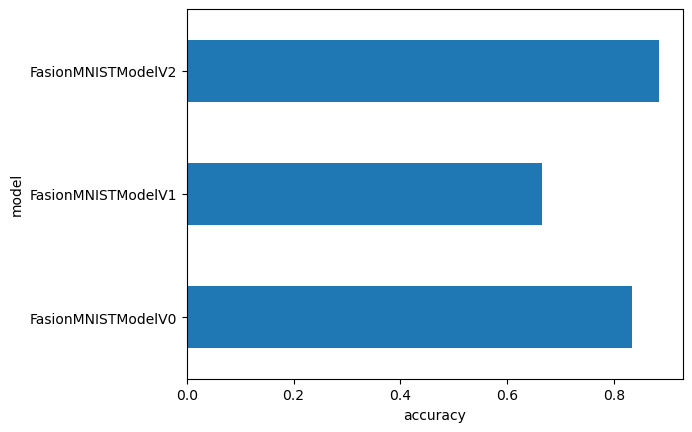

In [150]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model")


/tmp/ipykernel_3206/1119052974.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, i + 1)


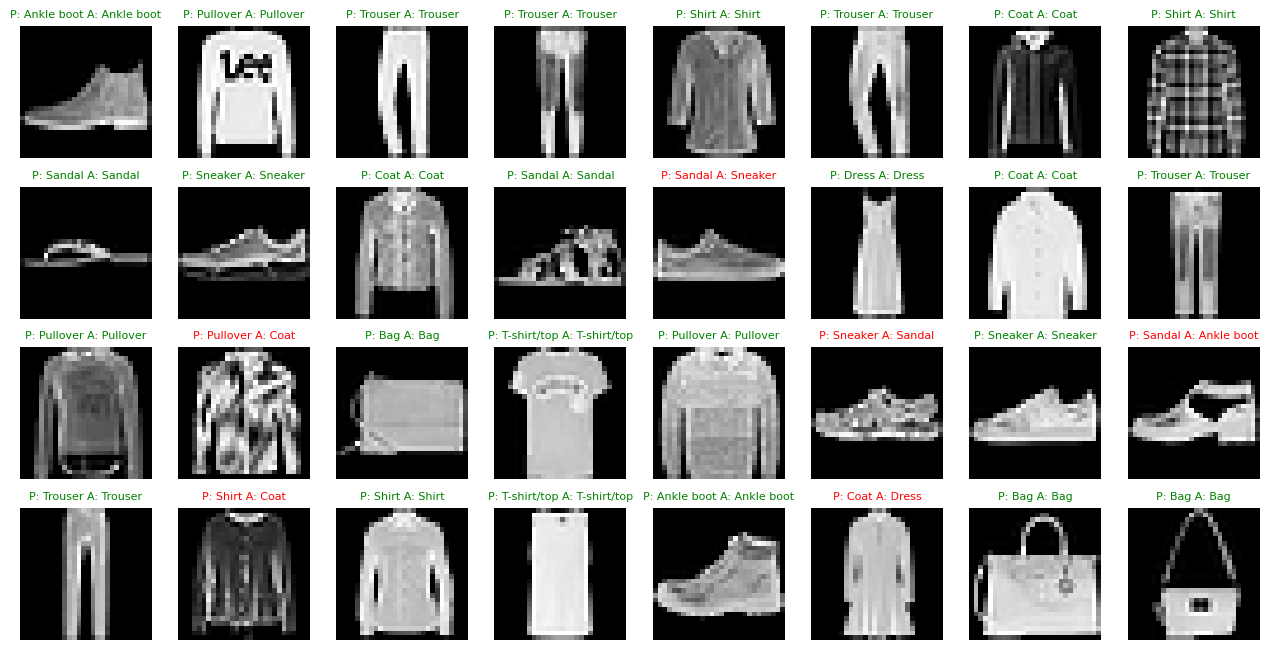

In [192]:
import random


index = random.randint(0, 31)

data_batch, target_batch = next(iter(test_dataloader))

nrows = 4
ncols = 8

plt.figure(figsize=(ncols * 2, nrows * 2))

for i, data in enumerate(data_batch):
    model_2.eval()
    with torch.inference_mode():
        prediction = torch.argmax(
            torch.softmax(model_2(data.unsqueeze(0).to(device)).squeeze(), dim=0)
        )

    target = target_batch[i]

    plt.axis("off")
    plt.subplot(nrows, ncols, i + 1)
    plt.axis("off")
    plt.imshow(data.squeeze(), cmap="gray")
    color = "g" if prediction.item() == target.item() else "r"
    plt.title(
        f"P: {test_data.classes[prediction.item()]} A: {test_data.classes[target.item()]}",
        c=color,
        fontsize=8,
    )


In [266]:
preds = []
targets = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making Inferences"):
        logits = model_2(X.to(device))
        pred = logits.softmax(1).argmax(1)
        preds.append(pred.cpu())
        targets.append(y.cpu())

preds = torch.cat(preds)
targets = torch.cat(targets)

preds, targets


Making Inferences:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1,  ..., 8, 1, 5]), tensor([9, 2, 1,  ..., 8, 1, 5]))

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

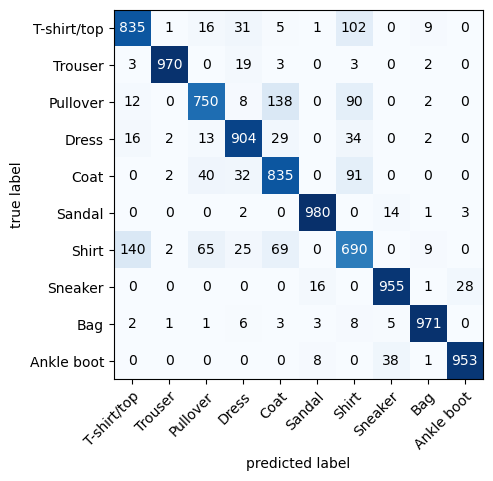

In [275]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(test_data.classes))
confmat_tensor = confmat(preds=preds, target=targets)


plot_confusion_matrix(confmat_tensor.numpy(), class_names=test_data.classes)


In [276]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "03_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_2.state_dict(), MODEL_SAVE_PATH)


In [280]:
loaded_model_2 = FasionMNISTModelV2(1, 10, len(training_data.classes))
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_2.to(device)


FasionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [282]:
eval_model(loaded_model_2, test_dataloader, loss_fn, acc_fn, device)


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FasionMNISTModelV2',
 'model_loss': 0.3140757083892822,
 'model_acc': 0.8844848275184631}